In [1]:
import numpy as np
import torch
from torch import nn
from tropical import Tropical, TropicalMonomial, TropicalPolynomial
from tropical import to_tensor, Tropical, TropicalMonomial, TropicalPolynomial, PolyNet, DiffPolyNet

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib notebook

In [4]:
import JuPyMake
JuPyMake.InitializePolymake()


True

In [5]:
JuPyMake.ExecuteCommand("application 'tropical';")

(True, '', '', '')

In [6]:
# = (−1x2)⊕(xy)⊕(−1y2)⊕x⊕y⊕(−1) 

JuPyMake.ExecuteCommand('$a = toTropicalPolynomial("max(-1+2*x0,x0+x1,-1+2*x1,x0,x1,-1)");')

(True, '', '', '')

In [7]:
JuPyMake.ExecuteCommand('print $a;')

(True, '-1*x_0^2 + x_0*x_1 + x_0 + -1*x_1^2 + x_1 + -1', '', '')

In [8]:
# =-0.5x2⊕(1xy)⊕(−2y2)⊕x⊕y⊕0

JuPyMake.ExecuteCommand('$b = toTropicalPolynomial("max(-0.5+2*x0,1+x0+x1,-2+2*x1,x0,x1,0)");')

(True, '', '', '')

In [9]:
JuPyMake.ExecuteCommand('print $b;')

(True, '-1/2*x_0^2 + 1*x_0*x_1 + x_0 + -2*x_1^2 + x_1 + 0', '', '')

In [10]:
JuPyMake.ExecuteCommand('$c = $a * $b;')

(True, '', '', '')

In [11]:
JuPyMake.ExecuteCommand('print $c;')

(True,
 '-3/2*x_0^4 + x_0^3*x_1 + -1/2*x_0^3 + 1*x_0^2*x_1^2 + 1*x_0^2*x_1 + x_0^2 + x_0*x_1^3 + 1*x_0*x_1^2 + x_0*x_1 + x_0 + -3*x_1^4 + -1*x_1^3 + x_1^2 + x_1 + -1',
 '',
 '')

In [12]:
JuPyMake.ExecuteCommand('$V = new Hypersurface<Max>(POLYNOMIAL=>$c);')

(True, '', '', '')

In [13]:
JuPyMake.ExecuteCommand('$ds = $V->dual_subdivision();')

(True, '', '', '')

In [55]:
print(JuPyMake.ExecuteCommand('print $ds->WEIGHTS;')[1])

3 3/2 0 -1 0 0 1 1/2 0 0 1 -1 0 -1 0


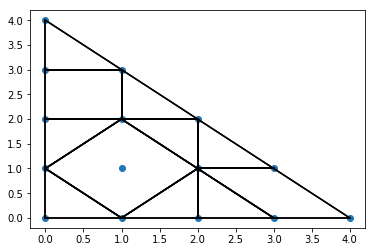

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline
pts = JuPyMake.ExecuteCommand('print $ds->POINTS;')[1]
pts = np.array([[int(j) for j in i.split()[1:]] for i in pts.split('\n')[:-1]])

plt.plot(pts[:,0], pts[:,1], 'o')

simp = JuPyMake.ExecuteCommand('print $ds->MAXIMAL_CELLS;')[1]
simp = np.array([[int(j) for j in i[1:-1].split()] for i in simp.split('\n')[:-1]])

adj = JuPyMake.ExecuteCommand('for (my $i=0; $i<$ds->N_MAXIMAL_CELLS; ++$i)\
                            {print $ds->cell($i)->GRAPH->ADJACENCY, "\t" }')[1]
adj = np.array([[[int(j[1]),int(j[-2])] for j in i.split('\n')[:-1]] for i in adj.split('\t')[:-1]])


new_simp = []

for i, vv in enumerate(adj):
    new_s = []
    for j, v in enumerate(vv):
        new_s.append([simp[i][j],simp[i][v[0]]])
        new_s.append([simp[i][j],simp[i][v[1]]])
    new_simp.append(new_s)

for simplex in new_simp:
    for v in simplex:
        plt.plot(pts[v, 0], pts[v, 1], 'k-')